In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from text_models import TextClassifier, extract_text_blocks
%load_ext autoreload
%autoreload 2

In [2]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Load Dataset 

In [3]:
df = pickle.load( open( "gdr_assignment_labelled.pkl", "rb" ))

In [4]:
model = TextClassifier()

In [5]:
X, y = model.tokenize_data(df['pp_sent'].values, df['label'])

Shape of data tensor: (8000,)
Found 3796 unique tokens.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train LSTM

In [ ]:
history_lstm = model.train_LSTM(X_train, y_train)

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test, 'MLP')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

In [ ]:
plot_graphs(history_lstm, 'categorical_accuracy')

In [ ]:
plot_graphs(history_lstm, 'loss')

# Train CNN

In [7]:
history_cnn = model.train_CNN(X_train, y_train)

Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 2s 418us/sample - loss: 0.4367 - categorical_accuracy: 0.2515 - val_loss: 0.3551 - val_categorical_accuracy: 0.4869
Epoch 2/5
4824/4824 [==============================] - 2s 388us/sample - loss: 0.2571 - categorical_accuracy: 0.7353 - val_loss: 0.1346 - val_categorical_accuracy: 0.9030
Epoch 3/5
4824/4824 [==============================] - 2s 373us/sample - loss: 0.0762 - categorical_accuracy: 0.9194 - val_loss: 0.0497 - val_categorical_accuracy: 0.9478
Epoch 4/5
4824/4824 [==============================] - 2s 367us/sample - loss: 0.0324 - categorical_accuracy: 0.9482 - val_loss: 0.0329 - val_categorical_accuracy: 0.9534
Epoch 5/5
4824/4824 [==============================] - 2s 369us/sample - loss: 0.0187 - categorical_accuracy: 0.9585 - val_loss: 0.0260 - val_categorical_accuracy: 0.9590


In [8]:
test_loss, test_acc = model.evaluate(X_test,y_test, 'CNN')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 74us/sample - loss: 0.0292 - categorical_accuracy: 0.9508
Test Loss: 0.029185188155282628
Test Accuracy: 0.9507575631141663


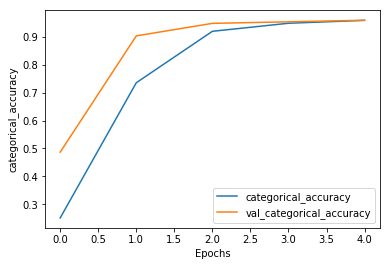

In [9]:
plot_graphs(history_cnn, 'categorical_accuracy')

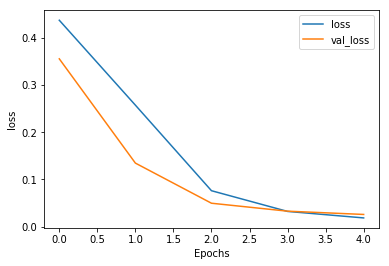

In [10]:
plot_graphs(history_cnn, 'loss')

# Train MLP

In [11]:
history_mlp = model.train_MLP(X_train, y_train)

Train on 4824 samples, validate on 536 samples
Epoch 1/5
4824/4824 [==============================] - 1s 114us/sample - loss: 2.2254 - categorical_accuracy: 0.1366 - val_loss: 0.5790 - val_categorical_accuracy: 0.1175
Epoch 2/5
4824/4824 [==============================] - 0s 41us/sample - loss: 0.6699 - categorical_accuracy: 0.1333 - val_loss: 0.4934 - val_categorical_accuracy: 0.1567
Epoch 3/5
4824/4824 [==============================] - 0s 40us/sample - loss: 0.5098 - categorical_accuracy: 0.1466 - val_loss: 0.4372 - val_categorical_accuracy: 0.1623
Epoch 4/5
4824/4824 [==============================] - 0s 40us/sample - loss: 0.4392 - categorical_accuracy: 0.1364 - val_loss: 0.3945 - val_categorical_accuracy: 0.1362
Epoch 5/5
4824/4824 [==============================] - 0s 40us/sample - loss: 0.4042 - categorical_accuracy: 0.1410 - val_loss: 0.3891 - val_categorical_accuracy: 0.1362


In [12]:
test_loss, test_acc = model.evaluate(X_test,y_test, 'MLP')
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

2640/2640 [==============================] - 0s 40us/sample - loss: 0.3896 - categorical_accuracy: 0.1473
Test Loss: 0.3895783662796021
Test Accuracy: 0.14734847843647003


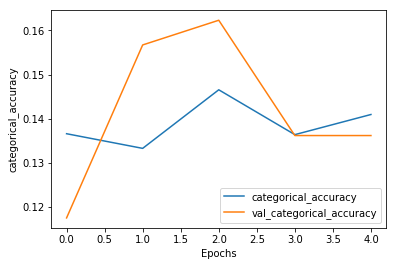

In [13]:
plot_graphs(history_mlp, 'categorical_accuracy')

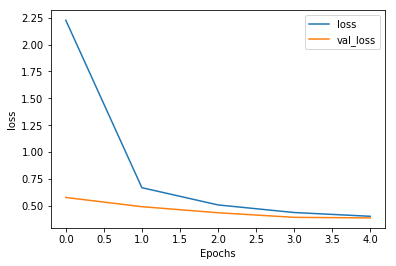

In [14]:
plot_graphs(history_mlp, 'loss')

In [15]:
data_pros_cons = pickle.load( open( "gdr_assignment_pros_cons.pkl", "rb" ))
blocks = extract_text_blocks(data_pros_cons.iloc[10,0])

# Predict CNN

In [ ]:
model.predict(blocks, model_name='CNN')

# Predict LSTM

In [ ]:
model.predict(blocks, model_name='LSTM')

# Predict MLP

In [ ]:
model.predict(blocks, model_name='MLP')